# <center>  GEOS3009/3909 – COASTAL ENVIRONMENTS AND PROCESSES

## <center>   PRACTICAL – PROCESSING WAVE DATA
    
<br>
<br>
<br>


### BACKGROUND – Wave analyses
<br>

<font size="3">
Processing and analysing wave data is an important skill. In this practical you are going to obtain
plots of power spectra for wave records. You are going learn how to enter and run a program
(script) in this notebook and you are going to learn how to interpret your results, including the relative
importance of short and long waves.


Spectral analysis is a technique that unravels the waves generated by different storms and describes
the complete distributions of wave energies and periods. Basically, the technique means to work
backward from the complexity of measured waves to determine the simple components whose
summation yields that complexity (Komar, 1998).


After doing this exercise, you should be able of entering and running a program in Matlab. You will
also learn about power spectra, you should be able to interpret relative energy levels and to identify
the frequency bands occupied by short waves and long waves.


Please refer to our lecture materials for more information on wave spectra

</font>

![alt text](../data/instrument_deployment.png "Title")

<i> <center>                        Deploying at Maroubra beach, ~9:30h 16 April 2021 (source Maleeka Barat)

# Add infor about Github -/ Codespace


<b> To analyse wave data we are using a Jupyter notebook: </b>

### Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

### An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.


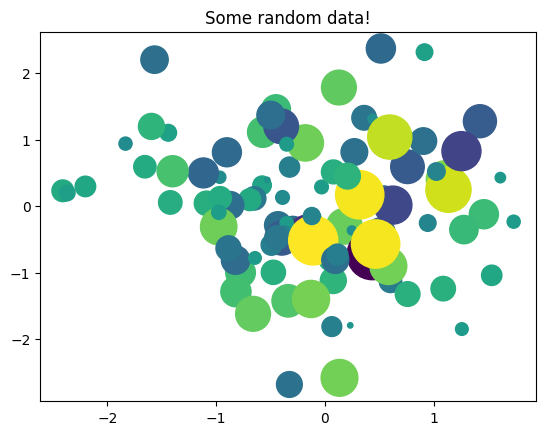

In [1]:
##### We can use '#' to create notes in the code. Please do this as you go.
##### As you can see below, it is very helpful when coding. 


from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data!")
plt.show()

<font size = "4"><b>
Ok, now lets look at some real data.
<br/>

First we need to install some packages

In [2]:
## --- Should only need to run these once to install packages on your device
#import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install matplotlib


Once the packages are installed, lets load them into the notebook:

In [3]:
import re
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.cm as cm


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['mathtext.fontset'] = 'cm'

Here we set up some functions. We will use these later to plot and analyse the data. 

In [4]:
def read_data(csv_file, head=16, cols=(0,1)):
    
    data = pd.read_csv(csv_file, header=head, usecols=cols, 
                       names = ['dates','pressure'], engine = 'python')
    
    # Convertion to datetime units
    data['dates'] = pd.to_datetime(data['dates'], format='%Y/%m/%d %H:%M:%S.%f')
    
    # Separate time and date
    data['date'] = pd.to_datetime(data['dates']).dt.date
    data['time'] = pd.to_datetime(data['dates']).dt.time

    return data


def PlotPressure(dataframe, title = 'Title', detrend=False):

    fig = plt.figure(figsize=(12,5), dpi=60) 
    ax = plt.gca()
    
    vals = dataframe.pressure
    if detrend:
        vals = dataframe.detrend
    plt.plot(dataframe.dates, vals, linestyle = 'solid', 
             c='b', label='pressure')
    
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title('Recorded Pressure Plot for ' +str(title), fontsize=10)
    ax.set_ylabel('Pressure (dbar)',fontsize=10)
    ax.set_xlabel('Date',fontsize=10)

    plt.show()
    
    return

def trim_time_interval(dataframe, start, end):
    
    trim_dataframe = dataframe[(dataframe.dates >= start) & (dataframe.dates <= end)]
    
    return trim_dataframe.copy()

Now we need to load the csv file. It is stored in the same folder as this notebook. Lets look at the raw data.

So we have dates and pressure. Lets use our function so we can separate date and time. 

In [6]:
#### ---- You will need to update this field to the correct file directory

csv_file = ('../data/prac2b_wavedata.csv')
data = pd.read_csv(csv_file)

Lets have a look at the data we have loaded. We have loaded the data as a Pandas Dataframe and we can use the following function to see the top rows of the data frame:

In [7]:
data.head()


,dates,pressure
0,2021-04-16 09:20:10.000,10.1907
1,2021-04-16 09:20:10.125,10.1906
2,2021-04-16 09:20:10.250,10.1907
3,2021-04-16 09:20:10.375,10.1907
4,2021-04-16 09:20:10.500,10.1909


or the bottom rows:

In [74]:
data.tail()


,dates,pressure
240364,2021-04-16 19:59:59.500,10.2094
240365,2021-04-16 19:59:59.625,10.2094
240366,2021-04-16 19:59:59.750,10.2095
240367,2021-04-16 19:59:59.875,10.2095
240368,2021-04-16 20:00:00.000,10.2095


In [75]:
data.dtypes

dates        object
pressure    float64
dtype: object

And the data types. What are data types? 
There is a full list of Python datatypes available here: https://docs.python.org/3/library/datatypes.html

We want our dates to be in datetime format. Here's how to convert:

In [76]:
# Convertion to datetime units
data['dates'] = pd.to_datetime(data['dates'], format='%Y/%m/%d %H:%M:%S.%f')

data.dtypes

dates       datetime64[ns]
pressure           float64
dtype: object

We an also use one of the functions we set up earlier to plot the data:

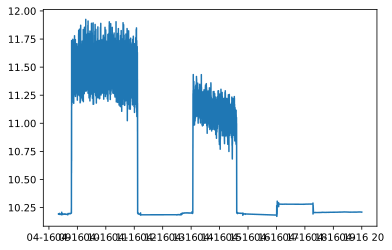

In [77]:
plt.plot(data.dates, data.pressure)
#PlotPressure(data, 'Both Beaches')

Here we can see that the data is pretty ugly. We have pressure in dbar and we have some periods where the instrument is out of the water. 
<br>
The first deployment was at Maroubra, the second at Malabar, and the final deployment was when Ana washed them in a sink. 
<br>
The instruments were turned on and recording during this time. 
<br>
We need to trim the data down to the times when it was submerged and measuring waves. 

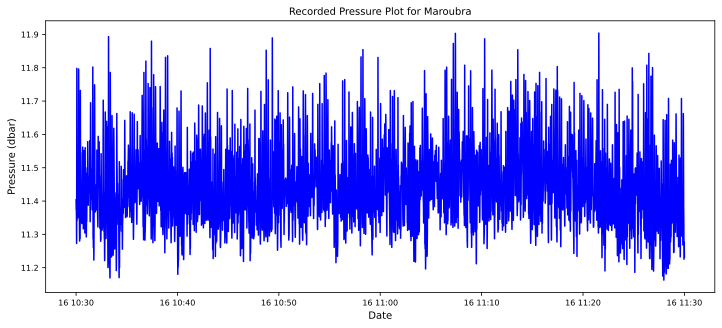

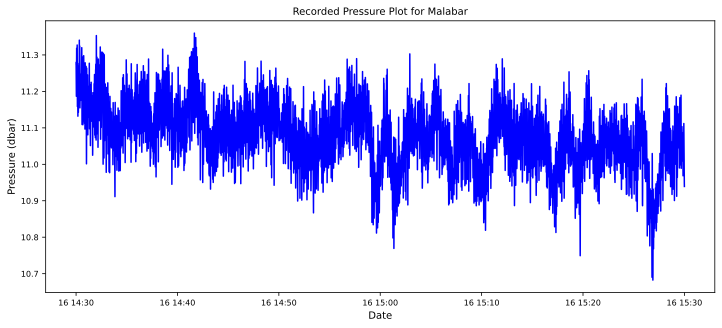

In [79]:
start_mar ='2021/04/16 10:30:00.00'
finish_mar = '2021/04/16 11:30:00.00'


start_mal = '2021/04/16 14:30:00.00'
finish_mal = '2021/04/16 15:30:00.00'

mar_data = trim_time_interval(data, start_mar, finish_mar)
mal_data = trim_time_interval(data, start_mal, finish_mal)

#mal_data.head()

PlotPressure(mar_data, title = 'Maroubra')
PlotPressure(mal_data, title = 'Malabar')

#mar_data

So the data is still pretty difficult to read. There are a mess of short and long waves mixed into our measurement. As the instrument records at 10hz, we can pick up little surface ripples (wind waves), we can see some longer gravity waves and there may be some even longer waves in the mix also. 
<br>

We can use a Fast Fourier Transform to look at the data in the frequency domain.
<br>
![alt text](FFT.png "An FFT converts a signal into its frequency components")
<i> <center> An FFT converts a signal into its frequency components

        

## Get power spectrum

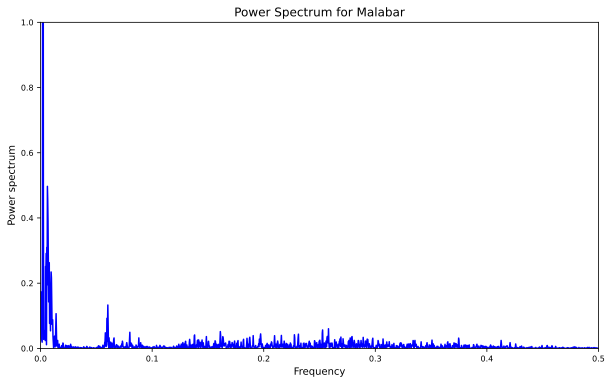

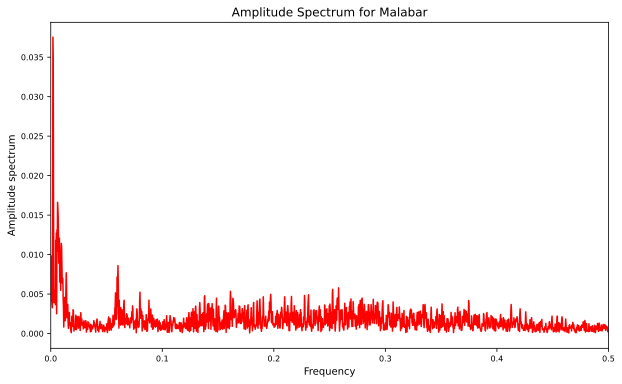

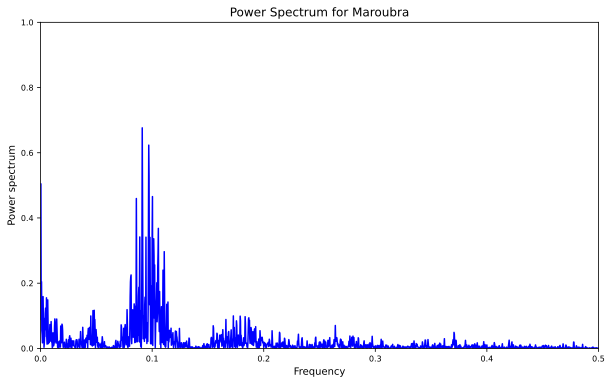

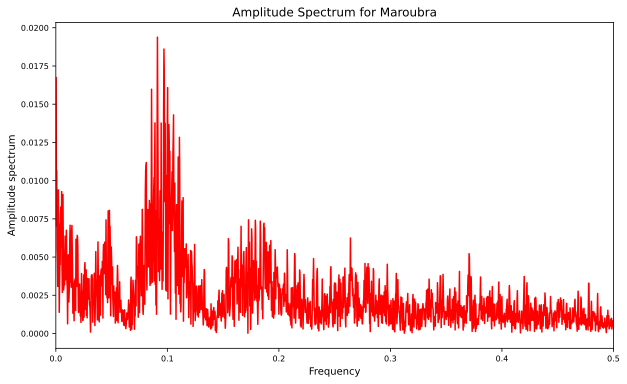

In [80]:
def PT_power(trimdata, dt=0.125, hanning=True, plot=True, title = 'Maroubra'):
    
    # Detrend the time series
    detrend = signal.detrend(trimdata.pressure, type == 'constant')
    n = len(detrend)
    if hanning:
        detrend = detrend*np.hanning(n)
        
    # Calculate FFT
    xn = np.fft.fft(detrend)

    if hanning:
        # Important: in the case that you apply the Hanning window, it is important to 
        # multiply the Fourier coefficients xn by sqrt(8/3).
        xn = xn *np.sqrt(8./3.)

    # Calculate the two sided Power Spectrum
    conj = xn.conjugate()
    pxx = dt*(xn*conj)/n
    
    # Calculate the two sided amplitude spectrum
    paa = np.sqrt(xn*conj)/n
    pxx = dt*(xn*conj)/n
    
    # Calculate one sided spectrum
    nf = int(np.fix((n/2.)+1))
    powerspec = (2.0 * pxx[0:nf]).real # power spectrum
    ampspec = (2.0*paa[0:nf]).real # amplitude spectrum

    # Define the frequency vector
    maxf = 1/(2*dt)
    df = 1/(n*dt)
    freq = np.arange(0,maxf,df)
    
    if plot:
        
        # For the power spectrum
        fig = plt.figure(figsize=(10,6), dpi=60) 
        ax = plt.gca()
        plt.plot(freq, powerspec, linestyle = 'solid', 
                 c='b', label='real part')
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.xlim(0,0.5)
        plt.ylim(0, 1)
        ax.set_ylabel('Power spectrum',fontsize=10)
        ax.set_xlabel('Frequency',fontsize=10)
#         plt.legend(loc=0, frameon=False)
        plt.title('Power Spectrum for ' +str(title))
        plt.show()

        fig = plt.figure(figsize=(10,6), dpi=60) 
        ax = plt.gca()
        plt.plot(freq, ampspec, linestyle = 'solid', 
                 c='r', label='real part')
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.xlim(0,0.5)
        plt.title('Amplitude Spectrum for ' +str(title))
        ax.set_ylabel('Amplitude spectrum',fontsize=10)
        ax.set_xlabel('Frequency',fontsize=10)
#         plt.legend(loc=0, frameon=False)
        plt.show()
    
    return freq, powerspec, ampspec

freq_mal, powerspec_mal, ampspec = PT_power(mal_data, dt=0.125, hanning=True, plot=True, title = 'Malabar')
freq_mar, powerspec_mar, ampspec = PT_power(mar_data, dt=0.125, hanning=True, plot=True, title = 'Maroubra')

<p style="color:red"> <font size="3"> <b>
Look at your spectra! Where are the energy peaks for the swell (less than 20s or more than 
0.05Hz) band? Can you see the wind waves and the swell waves? Which periods do they 
have? (you should now check with your field notebook if these numbers make sense) 
<br>
    <br> </b>
a. Are there any differences between Maroubra and Malabar? Why do you think that 
those differences in incident wave energy are so obvious? What happens at 
Malabar? Is there any obvious grouping? Can you find the infragravity? 
<br>
b. Can you find online the offshore wave conditions for the day of our fieldtrip? 
<br>
c. What is the frequency that separates short waves from long waves both surfzones?  
<br>
d. Which waves have the greatest energy? 

## Now lets look at the wave sprectral parameters. 

This large function titled 'Waves_spectral_PT2X' looks at the wave parameters in each frequency band. 

How are the frequency bands defined? The function uses an 'if' statement to group the waves into their frequency bands. 

In [81]:
def Waves_spectral_PT2X(beach_name, powerspec, freq, dt=0.125, wtype=None, show=False):
          
    # Calculate surface wave parameters
    n21 = powerspec.shape[0]
    n = (n21-1)*2

    # Calculating wave parameters in the gravity band (between 0.25 and 1 Hz means 1s and 4s)
    if wtype == 'wind':
        ids = np.where(np.logical_and(freq>=0.25,freq<1))
    elif wtype == 'gravity':
        ids = np.where(np.logical_and(freq>=0.05,freq<0.25)) 
    elif wtype == 'infra':
        ids = np.where(np.logical_and(freq>=0.0033,freq<0.05))
    else:
        print('This function calculates surface wave parameters for:')
        print('   - wind generated wave: wtype="wind"')
        print('   - gravity wave:        wtype="gravity"')
        print('   - infragravity wave:   wtype="infra"')
        print('You will need to define one of these 3 options.')
        return
    
    f = freq[ids]
    px = powerspec[ids]

    m0 = np.sum(px)/(n*dt)
    m1 = np.sum(f*px)/(n*dt)
    m2 = np.sum((f**2)*px)/(n*dt)
    m4 = np.sum((f**4)*px)/(n*dt)

    hs = 4.0*np.sqrt(m0)
    hrms = np.sqrt(8*m0)
    tm02 = np.sqrt(m0/m2)
    tm01 = m0/m1
    eps = np.sqrt(1.0-(m2**2)/(m0*m4))

    if wtype == 'infra':
        if show:
            print(beach_name)
            print('Spectral band:', wtype)
            print('hs    :', round(hs,2))
            print('hrms  :', round(hrms,2))
            print('tm01  :', round(tm01,2))
            print('tm02  :', round(tm02,2))
            print('eps   :', round(eps,2))
            print('')
        
        return hs, hrms, tm02, tm01, eps 
        
    # Calculate Hmax and Tpeak using a high cutoff freq.
    ii = np.where(f>=0.05)[0]
    fc = f[ii]
    pxc = px[ii]
    
    j = pxc.argmax(0)
    tpeak = 1./fc[j]
    hmax = 2.*hs

    if show:
        print(beach_name)
        print('Spectral band:', wtype)
        print('hs    :', round(hs,2))
        print('hrms  :', round(hrms,2))
        print('hmax  :', round(hmax,2))
        print('tm01  :', round(tm01,2))
        print('tm02  :', round(tm02,2))
        print('tpeak :', round(tpeak,2))
        print('eps   :', round(eps,2))
        print('')
    
    
    return hs, hrms, hmax, tm02, tm01, tpeak, eps


This function simply makes the last one more usable:

In [82]:
def get_wave_parameters(beach_name):
    
    if beach_name == 'Maroubra':
            hs_infra, hrms_infra, tm02_infra, tm01_infra, eps_infra  = Waves_spectral_PT2X('Maroubra', powerspec_mar, freq_mar, dt=0.125, 
                                                wtype='infra', show=True)
            hs_wind, hrms_wind, hmax_wind, tm02_wind, tm01_wind, tpeak_wind, eps_wind = Waves_spectral_PT2X('Maroubra', powerspec_mar, freq_mar, dt=0.125, 
                                                wtype='wind', show=True)
            hs_grav, hrms_grav, hmax_grav, tm02_grav, tm01_grav, tpeak, eps  = Waves_spectral_PT2X('Maroubra', powerspec_mar, freq_mar, dt=0.125, 
                                                wtype='gravity', show=True)
            
            yAxis = [hs_infra, hs_wind, hs_grav]
            xAxis = ['Infra', 'Wind', 'Gravity']
            
            plt.bar(xAxis,yAxis)
            plt.title('Maroubra Hs')
            plt.xlabel('Frequency Band')
            plt.ylabel('Hs (m)')
            plt.show()
            
            
    elif beach_name == 'Malabar':
            hs_infra, hrms_infra, tm02_infra, tm01_infra, eps_infra = Waves_spectral_PT2X('Malabar', powerspec_mal, freq_mal, dt=0.125, 
                                                wtype='infra', show=True)
          
            hs_wind, hrms_wind, hmax_wind, tm02_wind, tm0_wind1, tpeak_wind, eps_wind = Waves_spectral_PT2X('Malabar', powerspec_mal, freq_mal, dt=0.125, 
                                                             wtype='wind', show=True)
            # For gravity waves
            hs_grav, hrms_grav, hmax_grav, tm02_grav, tm01_grav, tpeak_grav, eps_grav = Waves_spectral_PT2X('Malabar', powerspec_mal, freq_mal, dt=0.125, 
                                                             wtype='gravity', show=True)
            
            yAxis = [hs_infra, hs_wind, hs_grav]
            xAxis = ['Infra', 'Wind', 'Gravity']
            
            plt.bar(xAxis,yAxis)
            plt.title('Malabar Hs')
            plt.xlabel('Frequency Band')
            plt.ylabel('Hs (m)')
            plt.show()
            
            
    else: print ('no beach data')
                    



Now we can look at the wave parameters in each frequency band. 

Malabar
Spectral band: infra
hs    : 0.16
hrms  : 0.11
tm01  : 115.29
tm02  : 96.2
eps   : 0.91

Malabar
Spectral band: wind
hs    : 0.15
hrms  : 0.11
hmax  : 0.3
tm01  : 2.9
tm02  : 2.81
tpeak : 3.88
eps   : 0.51

Malabar
Spectral band: gravity
hs    : 0.16
hrms  : 0.11
hmax  : 0.32
tm01  : 6.6
tm02  : 6.14
tpeak : 16.59
eps   : 0.56



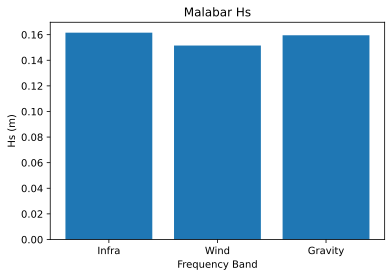

In [83]:
get_wave_parameters('Malabar')

Maroubra
Spectral band: infra
hs    : 0.15
hrms  : 0.11
tm01  : 40.8
tm02  : 34.13
eps   : 0.71

Maroubra
Spectral band: wind
hs    : 0.16
hrms  : 0.11
hmax  : 0.31
tm01  : 2.76
tm02  : 2.67
tpeak : 3.79
eps   : 0.51

Maroubra
Spectral band: gravity
hs    : 0.34
hrms  : 0.24
hmax  : 0.68
tm01  : 8.41
tm02  : 7.9
tpeak : 10.98
eps   : 0.62



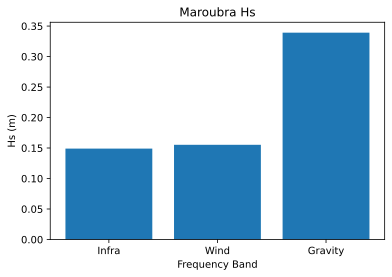

In [84]:
get_wave_parameters('Maroubra')

In [85]:
get_wave_parameters('Bondi')

no beach data


<p style="color:red"> <font size="3"> <b> What are the values for Malabar and Maroubra? What are the differences? Can you think of 
a reason (or several) why the results are so different. </p></font>

Now lets write a function to plot out waves:

This function converts the deci-bar units of the instrument to water depth. We also detrend the wave heights to remove some of the tidal effects visible in our first graph. 

In [92]:
def plotwaves(dataframe, title, detrend = True, plot=True):

    dataframe.index = dataframe.dates
    rho = 1098
    grav = 9.81
    Pa = 10000 #dbar to pascals
    dataframe['w_level'] = dataframe.pressure * Pa / (rho*grav)
    dataframe['detrend_wl'] = signal.detrend(dataframe.pressure, type == 'constant')
    #dataframe.head()
    
    fig = plt.figure(figsize=(10,5), dpi=60) 
    ax = plt.gca()
    #plt.suptitle('Recorded on ' +str(dataframe.date.iloc[-1]), y = np.max(dataframe.detrend_wl), fontsize=6)
    plt.title('Wave Heights at %s, %s  ' %(title, dataframe.dates.iloc[-1]))
    plt.plot(dataframe.detrend_wl, label = 
            'Wave Height')
    #ax.set_title('Waves')
    ax.set_ylabel('Water level(m)',fontsize=10)
    ax.set_xlabel('time',fontsize=10)
    plt.plot(dataframe.detrend_wl.resample("10s").median(), label = '10 Second Average')
    ax.legend()
    return 



And then plot them

In [94]:
#### I will change this to use OCEANLYZ to look at the waves

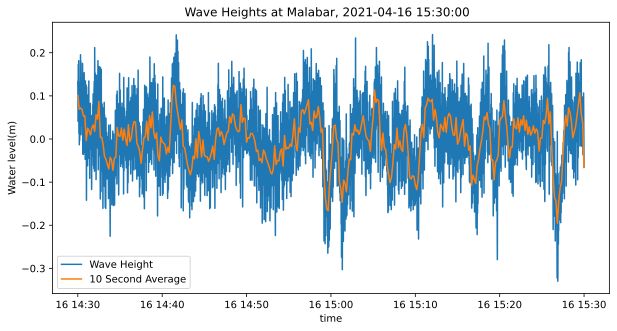

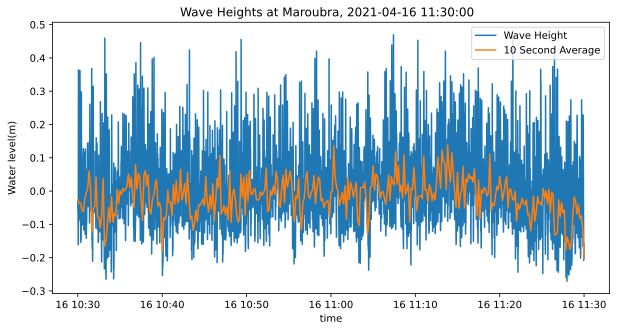

In [93]:
plotwaves(mal_data, 'Malabar')

plotwaves(mar_data, 'Maroubra')